In [107]:
%matplotlib inline

In [112]:
import sys
sys.path.append('/home/david/python/voltrad1')

from volsetup import config
import datetime as dt
import pandas as pd
import numpy as np
from volibutils.RequestUnderlyingData import RequestUnderlyingData
from time import sleep
from volibutils.sync_client import IBClient
import inspect
import time
from swigibpy import EPosixClientSocket, ExecutionFilter
from swigibpy import EWrapper
import swigibpy as sy
import sys
from volibutils.RequestOptionData import RequestOptionData
from datetime import datetime
import numpy as np


globalconf = config.GlobalConfig()
f = globalconf.open_historical_store()
df1=pd.DataFrame()
#list = ['/AAPL','/AMZN','/ES/20160916','/ES/20161216','/ES/20170317','/GOOG','/IWM','/NDX','/ORCL','/QQQ','/SPX','/SPY','/USO','/VIX']
list= ['/SPY']
for path_h5 in list:
    node = f.get_node(path_h5)
    temp = f.select(node._v_pathname)
    df1=df1.append(temp)
f.close()
df1.to_excel("aaaa.xlsx")

In [113]:
df2=df1.reset_index().drop_duplicates(subset='date',keep='last')
df2["date"] = pd.to_datetime(df2["date"])
df2.index = df2["date"]
conversion = {'open': 'first', 'high': 'max', 'low': 'min', 'close': 'last', 'volume': 'sum'}
df3=df2.resample('1D',how=conversion)
# remove weekends (insertaria sabado y domingo con valor NaN y no calcularia la rolling std)
df3=df3[df3.index.dayofweek < 5].dropna()

/home/david/anaconda2/lib/python2.7/site-packages/ipykernel/__main__.py:5: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)


In [120]:
df3['close_Stdev20'] = df3[['close']].rolling(window=20).std()
df3['close_Stdev10'] = df3[['close']].rolling(window=10).std()
df3['close_Stdev5'] = df3[['close']].rolling(window=5).std()
plot=pd.DataFrame()
plot1=pd.DataFrame()
plot2=pd.DataFrame()
plot3=pd.DataFrame()
#plot1['y']=(df3['close_Stdev5'].dropna().tolist())
plot1['median']=[np.median(df3['close_Stdev5'].dropna().tolist())]
plot1['pct90']=[np.percentile(df3['close_Stdev5'].dropna().tolist(),90)]
plot1['pct10']=[np.percentile(df3['close_Stdev5'].dropna().tolist(),10)]
plot1['x']=5
plot=plot.append(plot1)
#plot2['y']=(df3['close_Stdev10'].dropna().tolist())
plot2['median']=[np.median(df3['close_Stdev10'].dropna().tolist())]
plot2['pct90']=[np.percentile(df3['close_Stdev10'].dropna().tolist(),90)]
plot2['pct10']=[np.percentile(df3['close_Stdev10'].dropna().tolist(),10)]
plot2['x']=10
plot=plot.append(plot2)
#plot3['y']=(df3['close_Stdev20'].dropna().tolist())
plot3['median']=[np.median(df3['close_Stdev20'].dropna().tolist())]
plot3['pct90']=[np.percentile(df3['close_Stdev20'].dropna().tolist(),90)]
plot3['pct10']=[np.percentile(df3['close_Stdev20'].dropna().tolist(),10)]
plot3['x']=20
df=plot.append(plot3)
df.index = df['x']
del df['x']
df

,median,pct90,pct10
x,,,
5,0.491005,0.990723,0.292287
10,0.627468,1.098472,0.421678
20,0.973896,1.031840,0.837354


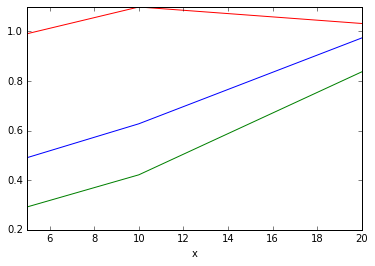

In [121]:
import matplotlib.pylab as plt
import matplotlib
#matplotlib.use('Agg')


fig, ax = plt.subplots()

df['median'].plot(ax=ax, style='b-')
df.pct90.plot(ax=ax, style='r-')
df.pct10.plot(ax=ax, style='g-')